<a href="https://colab.research.google.com/github/masakazu1000/Test/blob/main/graph_making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

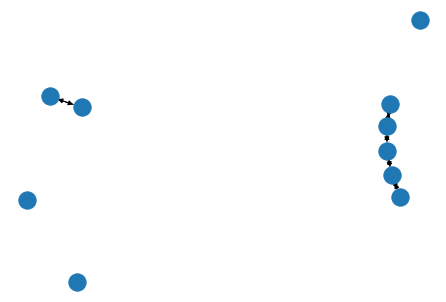

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import re
import collections
import numpy as np



class Graphs(nx.DiGraph):

	def __init__(self,k,area_k):
		self.G = nx.DiGraph()
		#フローの品種数
		self.k = k
		#1管理領域内のフローの品種数
		self.area_k = area_k
		#誤差の初期値
		self.eps = 0

		self.delta = 0
		#delta=((9*(1+eps))**(-(int(5/eps)+1)))*(1+eps)
		# delta=(1+eps)/(((1+eps)*sum_node)**(1/eps))

		self.flows = dict()
		self.flow_initialValues = dict()
		self.elb_flow_initialValues = dict()
		self.x = dict()
		self.initimal_list = list()
		self.all_flow_dict = dict()
		self.all_flows = list()



		# for flowlist_initialization in range(1,self.k+1):
		# 	#各品種のフロー量の総和のリスト(保存用)
		# 	self.flows.append(0)
		# 	#maxflow_algorithmで使うflowのリスト
		# 	self.flow_initialValues.append(0)
		# 	#ELB問題で使うelb_flowのリスト
		# 	self.elb_flow_initialValues.append(0)

		#エリアごとのノードをdictで保存
		self.area_nodes_dict = dict()



		super(Graphs, self).__init__()


	def graphMaker(self, G, number_of_area, number_of_areanodes, eps):
		self.G = G
		self.number_of_area = number_of_area
		self.number_of_areanodes = number_of_areanodes
		self.eps = eps

		sum_node = 12
		self.delta = (1+self.eps)/(((1+self.eps)*sum_node)**(1/self.eps))

		nodes = []
		edges = []
		for a in range(number_of_area):
			self.area_nodes_dict[a] = []

		#ノードの追加
		for n in range(1,13):
			G.add_node(n)
			nodes.append(n)

		#エッジの追加
		G.add_bidirectionaledge(G,1,2)
		G.add_bidirectionaledge(G,2,3)
		G.add_bidirectionaledge(G,3,4)
		G.add_bidirectionaledge(G,4,5)
		G.add_bidirectionaledge(G,5,6)
		G.add_bidirectionaledge(G,7,8)
		G.add_bidirectionaledge(G,8,9)
		G.add_bidirectionaledge(G,9,10)
		G.add_bidirectionaledge(G,10,11)
		G.add_bidirectionaledge(G,11,12)
		G.add_bidirectionaledge(G,2,8)
		G.add_bidirectionaledge(G,3,9)
		G.add_bidirectionaledge(G,4,10)
		G.add_bidirectionaledge(G,5,11)

		#エリアごとにノードを分ける
		
		#for area in range(1,number_of_area+1):
			#if(area > 1):
			#	for area_node in range(1,number_of_areanodes+1):
			#		(self.area_nodes_dict[area-1]).append((number_of_areanodes*(area-1))-height*(area-1)+area_node)
			#else:
			#	for area_node in range(1,number_of_areanodes+1):
			#		(self.area_nodes_dict[area-1]).append(area_node)

		area = 1
		for area_node in range(1,number_of_areanodes+1):
			(self.area_nodes_dict[area-1]).append(area_node)
	


	#引数として，エリア数，１エリアのノード数を渡す．
	def gridMaker(self, G, number_of_area, number_of_areanodes, area_width, area_height, eps):
		self.G = G
		self.number_of_area = number_of_area
		self.number_of_areanodes = number_of_areanodes
		self.area_width = area_width
		self.area_height = area_height

		sum_node = (area_width-1)*(area_height)*number_of_area+area_height

		#初期値を設定
		self.eps = eps
		#delta=((9*(1+eps))**(-(int(5/eps)+1)))*(1+eps)
		self.delta=(1+self.eps)/(((1+self.eps)*sum_node)**(1/self.eps))

		nodes = []
		edges = []
		for a in range(number_of_area):
			self.area_nodes_dict[a] = []


		width = ((area_width-1)*number_of_area)+1
		height = int(area_height)
		
		#ノードの追加
		for n in range(1,width*height+1):
			G.add_node(n)
			nodes.append(n)

		#エッジの追加
		for w in range(1,width+1):
			for h in range(1,height+1):
				#G.add_node((h-1)*height+h)
				if(w==width and h==height):
					break
				elif(w!=width and h==height):
					G.add_bidirectionaledge(G,height*w,height*(w+1))
				elif(h!=height and w==width):
					G.add_bidirectionaledge(G,(w-1)*height+h,(w-1)*height+(h+1))
				else:
					G.add_bidirectionaledge(G,(w-1)*height+h,(w-1)*height+(h+1))
					G.add_bidirectionaledge(G,(w-1)*height+h,w*height+h)


		#エリアごとにノードを分ける
		for area in range(1,number_of_area+1):
			if(area > 1):
				for area_node in range(1,number_of_areanodes+1):
					(self.area_nodes_dict[area-1]).append((number_of_areanodes*(area-1))-height*(area-1)+area_node)
			else:
				for area_node in range(1,number_of_areanodes+1):
					(self.area_nodes_dict[area-1]).append(area_node)

		# return G,self.area_nodes_dict
		#print(self.area_nodes_dict)

	#capacityの範囲
	list(range(500, 1001, 100))


	#ランダムグラフを作成する関数
	def make_random_graph(self, G, number_of_areanodes, p):
		self.G = G
		self.number_of_areanodes = number_of_areanodes
		self.p = p

		# ノードの追加
		nodes = []
		edges = []
		G.add_nodes_from(list(range(number_of_areanodes)))
		# nodes.append(n)

		# ランダムグラフの生成
		for i in range(number_of_areanodes):
			for j in range(i + 1, number_of_areanodes):
				if np.random.rand() < p:
					G.add_bidirectionaledge(G, i, j)
					#edges.append((i, j))
		
		#G.add_edges_from(edges)

	
	#双方向辺を追加する関数
	def add_bidirectionaledge(self,G,x,y):
		cap = random.randrange(500,1001,10)
		G.add_edge(x,y,capacity=int(cap),update_capacity=int(cap),length=float(self.delta),flow_list=list(self.initimal_list),flow_demand_init=dict(self.flow_initialValues),flow_init=list(self.initimal_list),flow_kakai=dict(self.flow_initialValues),flow_kakai_donyoku=dict(self.flow_initialValues),flow=dict(self.flow_initialValues),flow_frac=dict(self.flow_initialValues),flow_frac_donyoku=dict(self.flow_initialValues),elb_flow=dict(self.elb_flow_initialValues),candidate_flows=dict(),load_factor=0,load_factor_init=0,load_factor_frac=0,load_factor_frac_donyoku=0,load_factor_kakai=0,load_factor_kakai_donyoku=0,load_factor_part=0,x=dict(),x_kakai=dict(),x_donyoku_kakai=dict(),xf=dict(),xf_donyoku=dict(),x_init=dict(),flag=False)
		G.add_edge(y,x,capacity=int(cap),update_capacity=int(cap),length=float(self.delta),flow_list=list(self.initimal_list),flow_demand_init=dict(self.flow_initialValues),flow_init=list(self.initimal_list),flow_kakai=dict(self.flow_initialValues),flow_kakai_donyoku=dict(self.flow_initialValues),flow=dict(self.flow_initialValues),flow_frac=dict(self.flow_initialValues),flow_frac_donyoku=dict(self.flow_initialValues),elb_flow=dict(self.elb_flow_initialValues),candidate_flows=dict(),load_factor=0,load_factor_init=0,load_factor_frac=0,load_factor_frac_donyoku=0,load_factor_kakai=0,load_factor_kakai_donyoku=0,load_factor_part=0,x=dict(),x_kakai=dict(),x_donyoku_kakai=dict(),xf=dict(),xf_donyoku=dict(),x_init=dict(),flag=False)

		# G.add_edge(x,y,capacity=int(100),length=float(self.delta),flow=list(self.flow_initialValues),elb_flow=list(self.elb_flow_initialValues),load_factor=0)
		# G.add_edge(y,x,capacity=int(100),length=float(self.delta),flow=list(self.flow_initialValues),elb_flow=list(self.elb_flow_initialValues),load_factor=0)


		# self.arg = arg


	#部分誘導グラフを出力する関数
	def sub_graph(self,G,number_of_area, number_of_areanodes):
		# G.gridMaker(G, number_of_area, number_of_areanodes)
		node_list = self.area_nodes_dict[number_of_area]
		subG = G.subgraph(node_list)
		# print(subgraph.nodes())
		# print(subgraph.edges())
		return subG

	# 全フローをall_flowsにセット
	def set_all_flows(self,flows):
		self.all_flows = list(flows)

	# あるフローをall_flowsに追加
	def add_flow(self,flow):
		self.all_flows.append(flow)


	# i番目のエリアに始点も終点もあるフローを取得
	def get_i_area_flows(self,area_num):
		return self.all_flow_dict[area_num]


	# i番目のエリアに始点があるフローを取得
	def get_i_area_flows_kari(self,area_num):
		area_flows = []
		for f in self.all_flows:
			if(area_num in f.get_update_s_area()):
				area_flows.append(f)
		return area_flows


# g = Graphs(10,10)
# g.gridMaker(g,1,1,3,3,1)
# nx.draw(g)
# plt.show()

g = Graphs(10,10)
g.make_random_graph(g,10,0.1)
nx.draw(g)
plt.show()


# g = Graphs(3,3)
# g.graphMaker(g,1,1,1)
# nx.draw(g)
# plt.show()